In [1]:
import pandas as pd
from utils.myutils import Utils

%load_ext autoreload
%autoreload 2
utils = Utils()
import json
import seaborn as sns
import matplotlib.pyplot as plt

2023-12-22 13:13:43.688829: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-22 13:13:43.729205: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
df_base_normal = pd.read_json(
    "experiments/complete/gplvm/000_gplvm_normal_03_best.json"
)

In [3]:
df_base_contaminated = pd.read_json(
    "experiments/complete/gplvm/001_gplvm_contaminated.json"
)

In [4]:
#df_base_normal[["training_time"]].sort_values("training_time").head(2)

In [5]:
df_base_normal[["test_ratio"]] = df_base_normal[["pct_anomaly"]] / 100
df_base_normal[["train_ratio"]] = df_base_normal[["pct_anomaly"]] / 100
df_base_normal[["labeled_anomalies"]] = 1.0
df_base_normal[["method"]] = "ground_truth"

In [6]:
df_base_contaminated[["test_ratio"]] = df_base_contaminated[["pct_anomaly"]] / 100
df_base_contaminated[["train_ratio"]] = df_base_contaminated[["pct_anomaly"]] / 100
df_base_contaminated[["labeled_anomalies"]] = 0
df_base_contaminated[["method"]] = "blind"

# Epochs

In [7]:
df_epochs_0100 = pd.read_json(
    "experiments/complete/gplvm/002_gplvm_aucroc_normal_epoch_100.json"
)
df_epochs_1000 = pd.read_json(
    "experiments/complete/gplvm/002_gplvm_aucroc_normal_epoch_1000.json"
)
df_epochs_5000 = pd.read_json(
    "experiments/complete/gplvm/002_gplvm_aucroc_normal_epoch_5000.json"
)
df_epochs_0100_c = pd.read_json(
    "experiments/complete/gplvm/002_gplvm_aucroc_contaminated_epoch_100.json"
)
df_epochs_1000_c = pd.read_json(
    "experiments/complete/gplvm/002_gplvm_aucroc_contaminated_epoch_1000.json"
)
df_epochs_5000_c = pd.read_json(
    "experiments/complete/gplvm/002_gplvm_aucroc_contaminated_epoch_5000.json"
)

In [8]:
df_loe = utils.read_json_from_folder("experiments/complete/loe/")

In [9]:
df_soft_100 = df_loe[(df_loe.method == "soft") & (df_loe.labeled_anomalies == 1.00)]
df_refine_100 = df_loe[(df_loe.method == "refine") & (df_loe.labeled_anomalies == 1.00)]

In [10]:
comparative = pd.concat(
    [df_epochs_1000, df_soft_100[["dataset", "aucroc"]].reset_index()], axis=1
)
comparative.head(5)

,GPLVM,index,dataset,aucroc
0,0.516929,5,01_ALOI,0.515684
1,0.704775,21,02_annthyroid,0.689898
2,0.830173,37,03_backdoor,0.778855
3,0.991078,53,04_breastw,0.982446
4,0.732236,69,05_campaign,0.724794


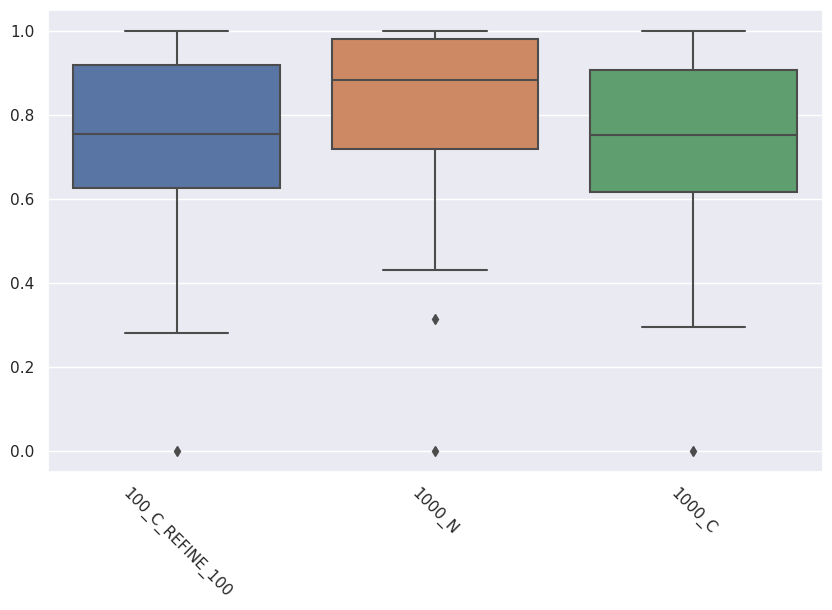

In [16]:
sns.set(rc={"figure.figsize": (10, 6)})

s = sns.boxplot(
    pd.concat(
        [
            # df_epochs_0100.rename(columns={"GPLVM": "100_N"}),
            # df_epochs_0100_c.rename(columns={"GPLVM": "100_C"}),
            #df_soft_100[["aucroc"]].rename(columns={"aucroc": "100_C_SOFT_100"}),
            df_refine_100[["aucroc"]].rename(columns={"aucroc": "100_C_REFINE_100"}),
            df_epochs_1000.rename(columns={"GPLVM": "1000_N"}),
            # df_base_normal[["test_auc_roc"]].rename(columns={"test_auc_roc": "1000_N0"}),
            df_epochs_1000_c.rename(columns={"GPLVM": "1000_C"}),
            # df_base_contaminated[["test_auc_roc"]].rename(columns={"test_auc_roc": "1000_C0"}),
            # df_epochs_5000.rename(columns={"GPLVM": "5000_N"}),
            # df_epochs_5000_c.rename(columns={"GPLVM": "5000_C"}),
        ],
        axis=1,
    )
)
plt.xticks(rotation=-45)
None

In [12]:
# ALT VS START

In [13]:
# loe_x = utils.read_json_from_folder("experiments/complete/loe_x/")

In [14]:
df_soft_alt = pd.read_json("experiments/complete/loe_x/00_all_soft_alt_la_100.json")
df_hard_alt = pd.read_json("experiments/complete/loe_x/00_all_hard_alt_la_100.json")
df_soft_start = pd.read_json("experiments/complete/loe_x/00_all_soft_start_la_100.json")
df_hard_start = pd.read_json("experiments/complete/loe_x/00_all_hard_start_la_100.json")
df_soft_padrao = pd.read_json(
    "experiments/complete/loe_x/00_all_soft_padrao_la_100.json"
)
df_hard_padrao = pd.read_json(
    "experiments/complete/loe_x/00_all_hard_padrao_la_100.json"
)
df_refine_padrao = pd.read_json(
    "experiments/complete/loe_x/00_all_refine_padrao_la_100.json"
)
df_blind_padrao = pd.read_json(
    "experiments/complete/loe_x/00_all_blind_padrao_la_100.json"
)

In [15]:
df_hard_start

,aucroc,aucpr,dataset,method,test_ratio,train_ratio,labeled_anomalies,loe_loss,n_epochs,tune
0,0.529418,0.037445,01_ALOI,hard,0.030333,0.030333,1,"[51.6597442627, 39.4370498657, 29.028968811, 4...",64,start
1,0.652016,0.199255,02_annthyroid,hard,0.074074,0.074074,1,"[8.5366802216, 2.8605828285, 3.7989435196, 6.4...",684,start
2,0.789560,0.275346,03_backdoor,hard,0.023667,0.023667,1,"[257.7048339844, 234.2075500488, 234.690948486...",213,start
3,0.950231,0.938457,04_breastw,hard,0.360000,0.360000,1,"[0.5848538876, 0.575150609, -0.2671810389, -0....",21,start
4,0.716276,0.236522,05_campaign,hard,0.110333,0.110333,1,"[83.4991226196, 81.7539825439, 79.1455001831, ...",999,start
5,0.892867,0.467487,06_cardio,hard,0.096364,0.096364,1,"[34.8494033813, 29.7399559021, 29.4346237183, ...",999,start
6,0.642044,0.374813,07_Cardiotocography,hard,0.220472,0.220472,1,"[18.6848583221, 18.2942276001, 14.8565826416, ...",999,start
7,0.820892,0.144967,08_celeba,hard,0.022333,0.022333,1,"[86.4749908447, 76.1471405029, 75.5553436279, ...",999,start
8,0.661110,0.086908,09_census,hard,0.061667,0.061667,1,"[716.2178955078, 668.7967529297, 703.602050781...",999,start
9,0.923274,0.096337,10_cover,hard,0.011000,0.011000,1,"[21.4269752502, 19.6396846771, 19.6018009186, ...",999,start


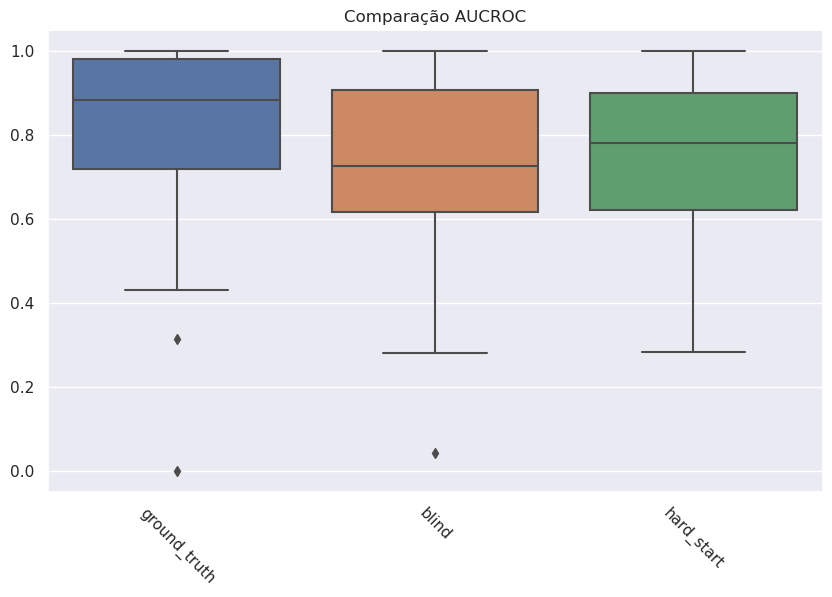

In [17]:
sns.set(rc={"figure.figsize": (10, 6)})

s = sns.boxplot(
    pd.concat(
        [
            # df_epochs_0100.rename(columns={"GPLVM": "100_N"}),
            # df_epochs_0100_c.rename(columns={"GPLVM": "100_C"}),
            df_epochs_1000.rename(columns={"GPLVM": "ground_truth"}),
            # df_epochs_1000_c.rename(columns={"GPLVM": "blind_0"}),
            df_blind_padrao[["aucroc"]].rename(columns={"aucroc": "blind"}),
            # df_refine_100[["aucroc"]].rename(columns={"aucroc": "refine"}),
            # df_refine_padrao[["aucroc"]].rename(columns={"aucroc": "refine_1000"}),
            # df_soft_alt[["aucroc"]].rename(columns={"aucroc": "soft_alt"}),
            # df_refine_50[["aucroc"]].rename(columns={"aucroc": "refine"}),
            # df_hard_alt[["aucroc"]].rename(columns={"aucroc": "hard_alt"}),
            # df_soft_padrao[["aucroc"]].rename(columns={"aucroc": "soft_padrao"}),
            # df_soft_start[["aucroc"]].rename(columns={"aucroc": "soft_start"}),
            # df_hard_padrao[["aucroc"]].rename(columns={"aucroc": "hard_padrao"}),
            df_hard_start[["aucroc"]].rename(columns={"aucroc": "hard_start"}),
            # df_base_normal[["test_auc_roc"]].rename(columns={"test_auc_roc": "1000_N0"}),
            # df_base_contaminated[["test_auc_roc"]].rename(columns={"test_auc_roc": "1000_C0"}),
            # df_epochs_5000.rename(columns={"GPLVM": "5000_N"}),
            # df_epochs_5000_c.rename(columns={"GPLVM": "5000_C"}),
        ],
        axis=1,
    )
)
s.set_title("Comparação AUCROC")
plt.xticks(rotation=-45)
None

In [41]:
compare_1000= pd.concat(
    [df_blind_padrao[["aucroc"]].rename(columns = {"aucroc": "blind"}), 
     df_hard_start[["aucroc", "dataset", "n_epochs", "train_ratio"]].rename(columns = {"aucroc": "hard_start"})],
    axis=1,
)
compare_1000.head()

,blind,hard_start,dataset,n_epochs,train_ratio
0,0.528335,0.529418,01_ALOI,64,0.030333
1,0.654761,0.652016,02_annthyroid,684,0.074074
2,0.826568,0.789560,03_backdoor,213,0.023667
3,0.968075,0.950231,04_breastw,21,0.360000
4,0.711116,0.716276,05_campaign,999,0.110333


In [42]:
compare_1000["diff"] = compare_1000["hard_start"] - compare_1000["blind"]

In [44]:
compare_1000[compare_1000["diff"]  > 0.01]

,blind,hard_start,dataset,n_epochs,train_ratio,diff
10,0.726625,0.780982,11_donors,999,0.054000,0.054357
14,0.616321,0.652729,15_Hepatitis,999,0.170000,0.036407
27,0.787558,0.807887,28_pendigits,999,0.022804,0.020329
31,0.936444,0.993217,32_shuttle,30,0.073667,0.056772
32,0.678543,0.726482,33_skin,999,0.212333,0.047938
33,0.043014,0.282761,34_smtp,999,0.000333,0.239747
37,0.913345,0.923590,38_thyroid,999,0.024735,0.010244
43,0.282249,0.301182,44_Wilt,43,0.053250,0.018933
45,0.520849,0.566756,46_WPBC,999,0.250000,0.045906
46,0.418837,0.433547,47_yeast,21,0.340807,0.014709


In [21]:
df_epochs_1000.GPLVM.quantile(q=[0.25, 0.5, 0.75])

0.25    0.718505
0.50    0.882748
0.75    0.981058
Name: GPLVM, dtype: float64

In [22]:
df_blind_padrao.aucroc.quantile(q=[0.25, 0.5, 0.75])

0.25    0.617387
0.50    0.726625
0.75    0.908054
Name: aucroc, dtype: float64

In [23]:
df_hard_start.aucroc.quantile(q=[0.25, 0.5, 0.75])

0.25    0.621996
0.50    0.780982
0.75    0.899988
Name: aucroc, dtype: float64

In [24]:
df_epochs_1000_c_joined = pd.concat(
    [
        df_epochs_1000_c,
        df_soft_100[["dataset", "train_ratio"]].reset_index(),
    ],
    axis=1,
)

In [25]:
(
    df_hard_start[df_hard_start.train_ratio > 0.3][["aucroc"]].median(),
    df_soft_start[df_soft_start.train_ratio > 0.3][["aucroc"]].median(),
    df_hard_alt[df_hard_start.train_ratio > 0.3][["aucroc"]].median(),
    df_soft_alt[df_soft_start.train_ratio > 0.3][["aucroc"]].median(),
    df_refine_100[df_refine_100.train_ratio > 0.3][["aucroc"]].median(),
    df_epochs_1000_c_joined[df_epochs_1000_c_joined.train_ratio > 0.3][
        ["GPLVM"]
    ].median(),
)

(aucroc    0.645477
 dtype: float64,
 aucroc    0.666248
 dtype: float64,
 aucroc    0.664494
 dtype: float64,
 aucroc    0.663509
 dtype: float64,
 aucroc    0.688641
 dtype: float64,
 GPLVM    0.659877
 dtype: float64)

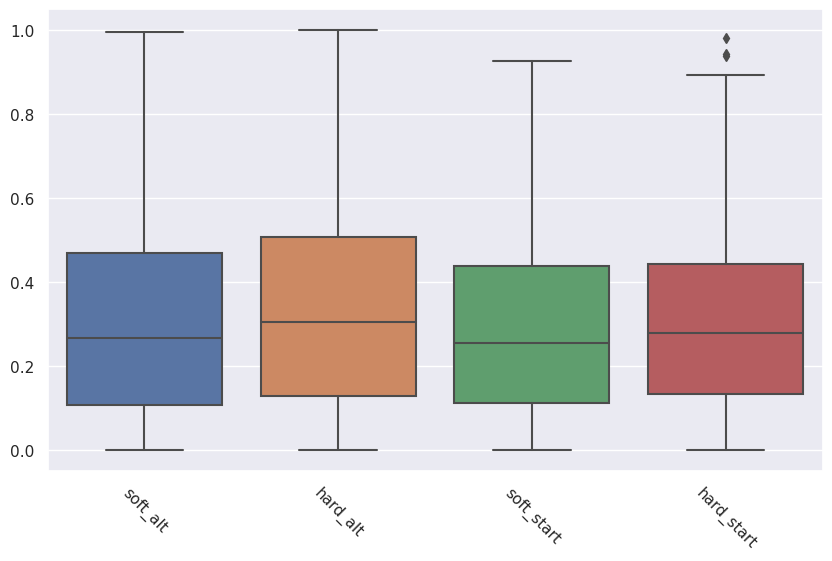

In [26]:
sns.set(rc={"figure.figsize": (10, 6)})

s = sns.boxplot(
    pd.concat(
        [
            # df_epochs_0100.rename(columns={"GPLVM": "100_N"}),
            # df_epochs_0100_c.rename(columns={"GPLVM": "100_C"}),
            # df_epochs_1000.rename(columns={"GPLVM": "ground"}),
            # df_epochs_1000_c.rename(columns={"GPLVM": "blind"}),
            df_soft_alt[["aucpr"]].rename(columns={"aucpr": "soft_alt"}),
            df_hard_alt[["aucpr"]].rename(columns={"aucpr": "hard_alt"}),
            df_soft_start[["aucpr"]].rename(columns={"aucpr": "soft_start"}),
            df_hard_start[["aucpr"]].rename(columns={"aucpr": "hard_start"}),
            # df_base_normal[["test_auc_roc"]].rename(columns={"test_auc_roc": "1000_N0"}),
            # df_base_contaminated[["test_auc_roc"]].rename(columns={"test_auc_roc": "1000_C0"}),
            # df_epochs_5000.rename(columns={"GPLVM": "5000_N"}),
            # df_epochs_5000_c.rename(columns={"GPLVM": "5000_C"}),
        ],
        axis=1,
    )
)
plt.xticks(rotation=-45)
None

In [27]:
compare_1000

,blind,hard_start,dataset,n_epochs,diff
0,0.528335,0.529418,01_ALOI,64,0.001083
1,0.654761,0.652016,02_annthyroid,684,-0.002746
2,0.826568,0.789560,03_backdoor,213,-0.037008
3,0.968075,0.950231,04_breastw,21,-0.017843
4,0.711116,0.716276,05_campaign,999,0.005160
5,0.885767,0.892867,06_cardio,999,0.007099
6,0.643434,0.642044,07_Cardiotocography,999,-0.001390
7,0.828603,0.820892,08_celeba,999,-0.007711
8,0.661157,0.661110,09_census,999,-0.000047
9,0.920023,0.923274,10_cover,999,0.003251
